![king county image, from https://www.racialequityalliance.org/jurisdictions/king-county-washington/](https://www.racialequityalliance.org/wp-content/uploads/2016/10/assessors_social-1.jpg)


# King County Real Estate Prices

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

Questions to consider:

- Who are your stakeholders?
- What are your stakeholders' pain points related to this project?
- Why are your predictions important from a business perspective?


Amazon has awarded us a Grant for 60 million dollars to go towards affordable housing aquisitions in the King County Area.


In [1]:
#Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score, mean_absolute_error
import utils 




## Data Understanding

Describe the data being used for this project.

Questions to consider:

- Where did the data come from, and how do they relate to the data analysis questions?
- What do the data represent? Who is in the sample and what variables are included?
- What is the target variable?
- What are the properties of the variables you intend to use?

In [2]:
#Reading in our data
df = pd.read_csv('../../data/kc_house_data.csv')

In [3]:
#Looking at column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
#Checking int, float columns
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  17755.000000   
mean   1.509941e+04      1.494096   1788.596842   1970.999676     83.636778   
std    4.141264e+04      0.539683    827.759761     29.375234    399.946414   
min    5.200000e+02      1.000000    370.000000   1900.000000      0.000000   
25%    5.040000e+03      1.000000   1190.000000   1951.000000      0.000000   
50%    7.618000e+03      1.500000   1560.000000   1975.000000      0.000000   
75%    1.068500e+04      2.000000   2210.000000   1997.000000      0.000000   
max    1.651359e+06      3.500000   9410.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [5]:
#Looking at null values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [108]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

- Null values found in waterfront, view, and yr_renovated.

### First Observations
 - In price, the max price is very significantly larger than the mean. We will look further into the column to evaluate outliers.
 - In bedrooms, there is a large max value indicating an outlier. We will remove later. This column may be treated as  categorical. 
 - In bathrooms, the max value is much higher than most of the dataset. This many bathrooms may be from a building that is not representative of the homes we would like to work with in our model. This column may be treated as categorical.
 - In sqft_living the max value is significantly larger than the mean. This large of a building may not be representative of the homes we would like to work with in our model.
 - In sqft_lot, the max value is significantly larger than a large portion of the dataset. This large of a lot may not be representative of the homes we would like to work with in our model. 
 - In floors, there is a max value that is larger than the majority of our dataset. We may restrict the number of floors in our model. 
 - In yr_built
 - In yr_renovated
 - In zipcode
 - In lat and Long
 - In sqft_living15
 - In sqft_lot15

In [6]:
#Explore object columns
obj_cols = [c for c in df.columns if df[c].dtype == 'object']
df[obj_cols].describe()

date waterfront   view condition      grade sqft_basement
count       21597      19221  21534     21597      21597         21597
unique        372          2      5         5         11           304
top     6/23/2014         NO   NONE   Average  7 Average           0.0
freq          142      19075  19422     14020       8974         12826

### First Observations

- Date column may need to be reformatted so that we can work with the values
- Waterfront has 11% null values and 88% of the values recorded are no. Only ~1% of the properties have waterfront access
- View has some null values and 90% have a value of none. 
- Condition is an ordinal feature with values of 1 - 5 
- Grade is an ordinal feature with values 3 - 13 
- sqft_basement is being treated as an object when it is an integer. 

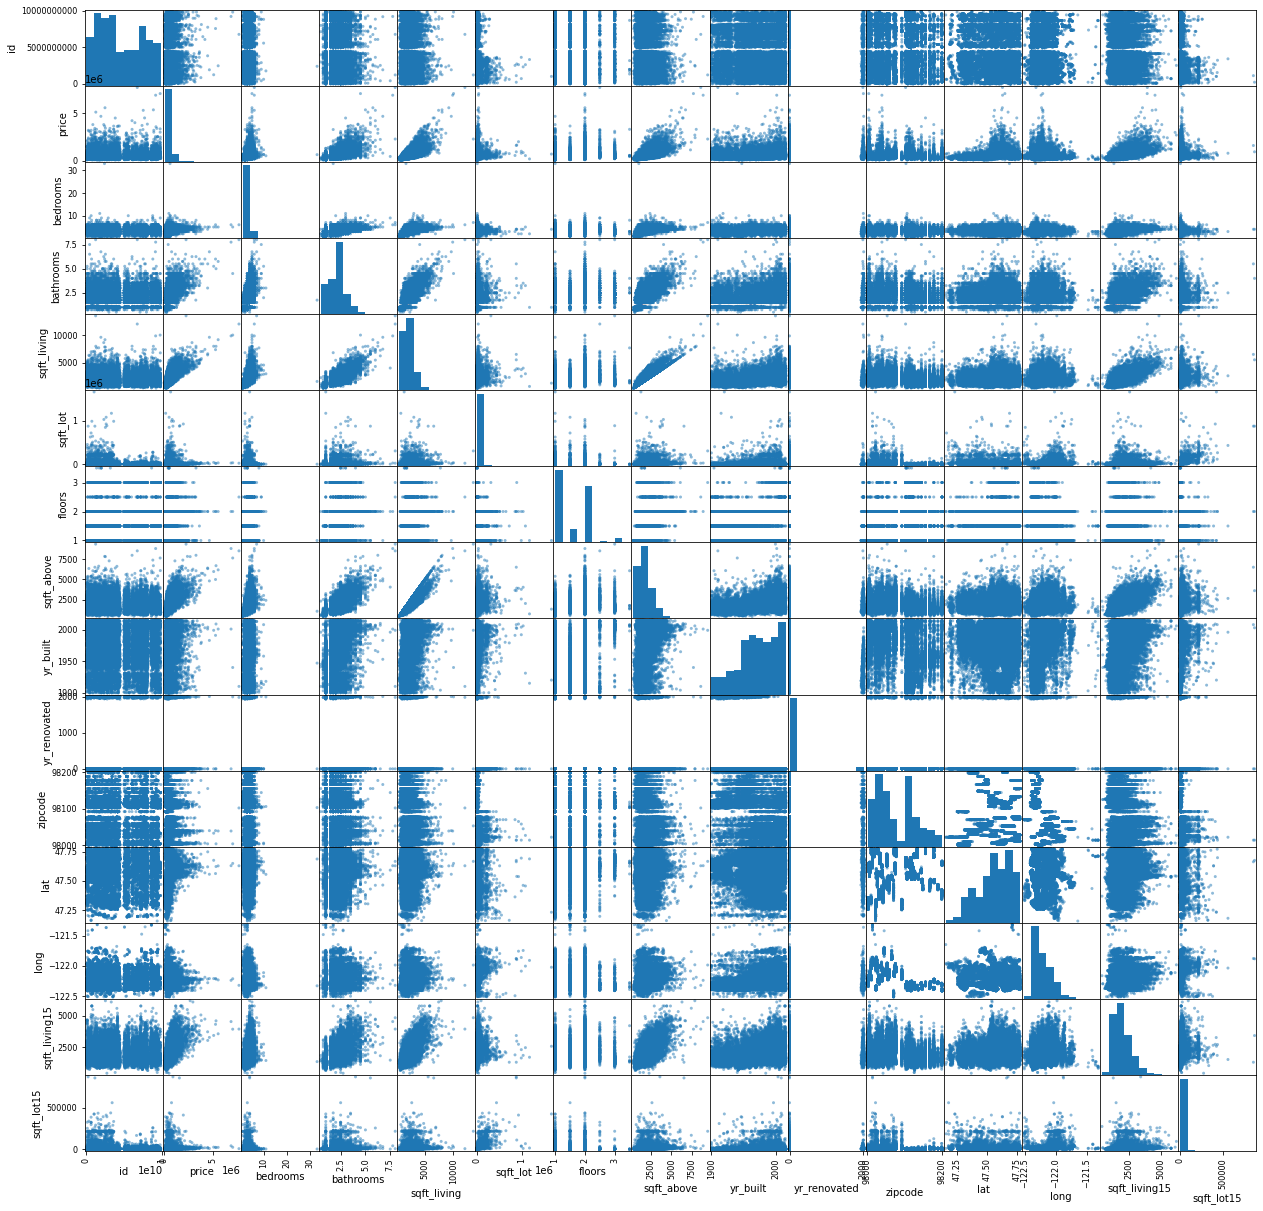

In [7]:
#Scatter matrix of all data to get a quick view of any obvious trends. 
pd.plotting.scatter_matrix(df, figsize = [21,21]);
plt.show()

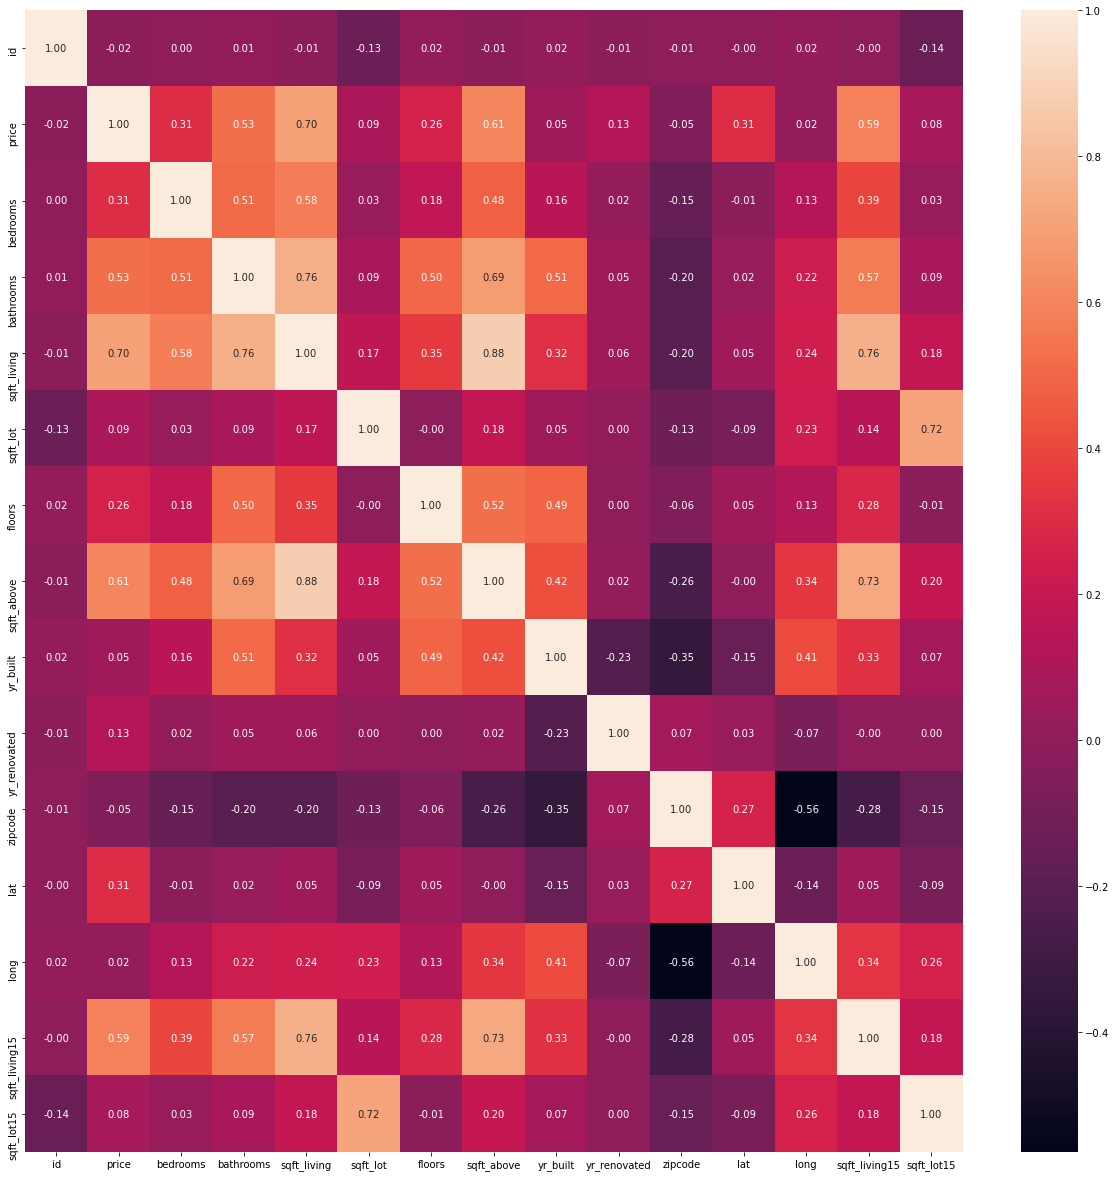

In [8]:
#Initial heatmap highlighing obvious correlations with Price
plt.figure(figsize = (21,21))
sns.heatmap(df.corr(), annot = True, fmt = '.2f');

- sqft_living shows the highest correlation with price 

## Data Preparation

Describe and justify the process for preparing the data for analysis.

Questions to consider:

- Were there variables you dropped or created?
- How did you address missing values or outliers?
- Why are these choices appropriate given the data and the business problem?

In [9]:
#Creating unique dataframe with restricted values
df_limited  = df

In [10]:
#There are ? values in sq_ft basement, causing it to be categorized as an object. Removing those values.
#Initial analysis showed the sqft basement is the sqft living space minus the sqft above space.
df_limited['sqft_basement'] = df_limited['sqft_living'] - df_limited['sqft_above']


In [11]:
#Dropping Id, waterfront, View, yr_renovated. 
#Id won't be very useful for our analysis. 
#Waterfront properties only represent ~1% of the properties in the dataset and are not significant for our model.
#90% of the values in view are none. The remaining values aren't significant enough to remain in our model.
#97% of vales in yr_renovated are either null or 0.0
df_limited = df.drop(columns = ['id', 'waterfront', 'view', 'yr_renovated'])

In [12]:
#Turning the grade column into a numerical column
grade_df = df_limited[["grade"]]

for i in range(len(grade_df)):
    grade_df.at[i,"grade"] = grade_df.at[i,"grade"][:2]
    grade_df.at[i,"grade"].strip()
    grade_df.at[i,"grade"] = int(grade_df.at[i,"grade"])

grade_df.rename(columns = {'grade': 'num_grade'}, inplace = True)

df_limited = pd.concat([grade_df, df_limited], axis=1)

In [13]:
df_limited['num_grade'] = df_limited['num_grade'].astype(str).astype(int)

In [14]:
#Turning object date into a datetime64 and isolating month
df_limited['date'] = pd.to_datetime(df_limited['date'])


In [15]:
df_limited['month_date'] = df_limited['date'].dt.strftime('%m')

In [16]:
df_limited['month_date'] = df_limited['month_date'].astype(str).astype(int)

In [17]:
#Restricting bedroom number to exclude outliers and be more representative of single family homes.
df_limited = df_limited[(df_limited['bedrooms'] < 6) & (df_limited['bedrooms'] > 1)]

In [18]:
#Restricting bathroom number to exclude outliers and be more representative of single family homes.
df_limited = df_limited[df_limited['bathrooms'] < 5]

In [19]:
#Restricting floor number to exclude outliers and be more representative of single family homes.
df_limited = df_limited[df_limited['floors'] <= 3]

In [20]:
#Restricting price to train our model on realistic home prices
df_limited = df_limited[df_limited['price'] < 2000000]

In [21]:
#Restricting the square foot living space 
df_limited = df_limited[df_limited['sqft_living'] < 6000]

In [22]:
#restricting the square foot lot space
df_limited = df_limited[df_limited['sqft_lot'] < 10000]

In [23]:
#restricting basement size
df_limited = df_limited[df_limited['sqft_basement'] < 2000]

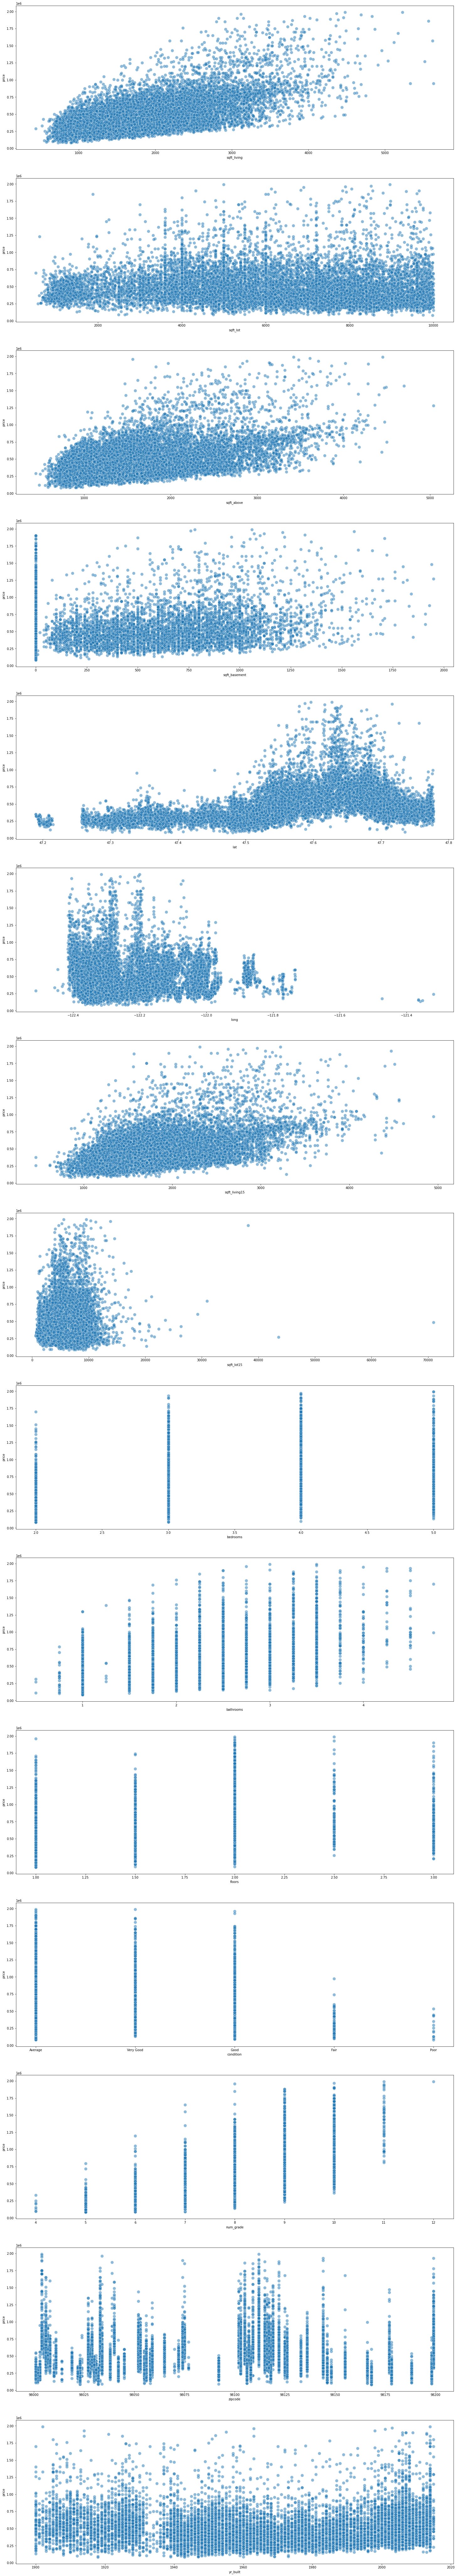

In [24]:
features = [
     "sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "lat", "long",
    "sqft_living15", "sqft_lot15", "bedrooms", "bathrooms", "floors", 
     "condition", "num_grade", "zipcode", "yr_built"
    
]


fig = plt.figure(figsize=(25, len(features)*10))
for i, col in enumerate(features):
    ax = fig.add_subplot(len(features), 1, i + 1)
    if col in features:
        sns.scatterplot(x=col, y="price", data=df_limited, ax=ax, alpha=0.5, s=100)

## Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How did you analyze the data to arrive at an initial approach?
- How did you iterate on your initial approach to make it better?
- Why are these choices appropriate given the data and the business problem?

In [25]:
#Setting our X and Y for our train test split. 
X = df_limited.drop(columns = 'price')
y = df_limited['price']

In [26]:
#Performing train test split using test size of 25%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .25, random_state = 42)

In [27]:
print("X Train:")
display(X_train.describe())
print("X Test:")
display(X_test.describe())

X Train:


num_grade      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  11233.000000  11233.000000  11233.000000  11233.000000  11233.000000   
mean       7.476809      3.278554      2.040795   1891.894774   6031.819104   
std        0.973482      0.801275      0.710936    719.450946   2380.532067   
min        4.000000      2.000000      0.500000    440.000000    520.000000   
25%        7.000000      3.000000      1.500000   1360.000000   4377.000000   
50%        7.000000      3.000000      2.000000   1780.000000   6200.000000   
75%        8.000000      4.000000      2.500000   2320.000000   7927.000000   
max       11.000000      5.000000      4.750000   5635.000000   9998.000000   

             floors    sqft_above  sqft_basement      yr_built       zipcode  \
count  11233.000000  11233.000000   11233.000000  11233.000000  11233.000000   
mean       1.521855   1635.504763     256.390012   1970.553459  98085.667141   
std        0.557093    672.652455     381.416136     31.707717     52.819915   
min        1.000000    440.000000       0.000000   1900.000000  98001.000000   
25%        1.000000   1140.000000       0.000000   1948.000000  98034.000000   
50%        1.500000   1460.000000       0.000000   1973.000000  98103.000000   
75%        2.000000   1990.000000     500.000000   2001.000000  98122.000000   
max        3.000000   5040.000000    1950.000000   2015.000000  98199.000000   

                lat          long  sqft_living15    sqft_lot15    month_date  
count  11233.000000  11233.000000   11233.000000  11233.000000  11233.000000  
mean      47.564210   -122.238645    1835.441200   6257.088489      6.575625  
std        0.135868      0.129943     570.832913   2674.102634      3.119247  
min       47.189600   -122.512000     460.000000    659.000000      1.000000  
25%       47.484200   -122.344000    1430.000000   4500.000000      4.000000  
50%       47.575900   -122.283000    1720.000000   6242.000000      6.000000  
75%       47.680100   -122.164000    2140.000000   8000.000000      9.000000  
max       47.777600   -121.364000    4950.000000  70973.000000     12.000000

X Test:


num_grade     bedrooms    bathrooms  sqft_living     sqft_lot  \
count  3745.000000  3745.000000  3745.000000  3745.000000  3745.000000   
mean      7.493725     3.270761     2.036916  1902.271295  6037.448598   
std       0.983858     0.797875     0.712274   745.403261  2343.272736   
min       4.000000     2.000000     0.750000   540.000000   600.000000   
25%       7.000000     3.000000     1.500000  1350.000000  4498.000000   
50%       7.000000     3.000000     2.000000  1780.000000  6181.000000   
75%       8.000000     4.000000     2.500000  2330.000000  7923.000000   
max      12.000000     5.000000     4.750000  5120.000000  9999.000000   

            floors   sqft_above  sqft_basement     yr_built       zipcode  \
count  3745.000000  3745.000000    3745.000000  3745.000000   3745.000000   
mean      1.522830  1646.069159     256.202136  1969.549533  98085.457944   
std       0.552964   691.067008     383.929052    32.320151     52.739319   
min       1.000000   480.000000       0.000000  1900.000000  98001.000000   
25%       1.000000  1140.000000       0.000000  1947.000000  98038.000000   
50%       1.500000  1460.000000       0.000000  1971.000000  98103.000000   
75%       2.000000  2020.000000     500.000000  2001.000000  98119.000000   
max       3.000000  4500.000000    1910.000000  2015.000000  98199.000000   

               lat         long  sqft_living15    sqft_lot15   month_date  
count  3745.000000  3745.000000    3745.000000   3745.000000  3745.000000  
mean     47.563931  -122.237308    1848.052336   6236.612283     6.591722  
std       0.134163     0.131552     584.873112   2531.349863     3.122018  
min      47.189600  -122.456000     690.000000    651.000000     1.000000  
25%      47.486400  -122.344000    1430.000000   4560.000000     4.000000  
50%      47.576600  -122.282000    1720.000000   6231.000000     6.000000  
75%      47.678700  -122.162000    2160.000000   8000.000000     9.000000  
max      47.777100  -121.319000    4560.000000  30950.000000    12.000000

In [28]:
train_df = pd.concat([X_train, y_train], axis = 1)


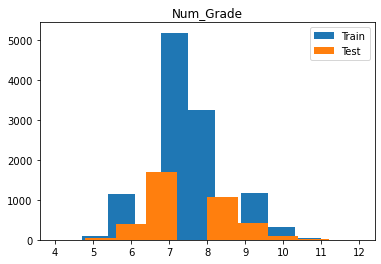

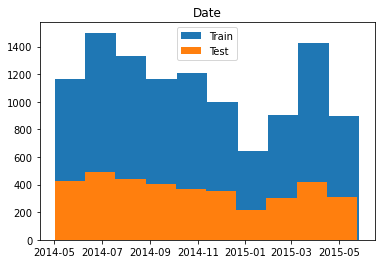

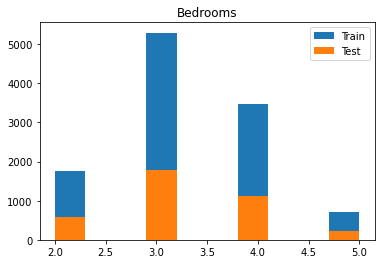

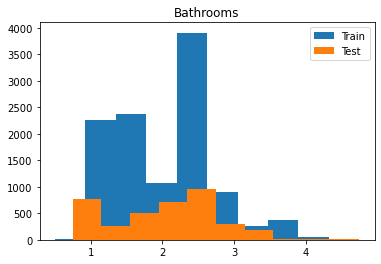

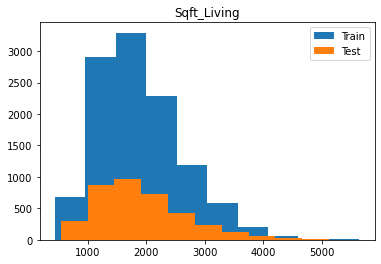

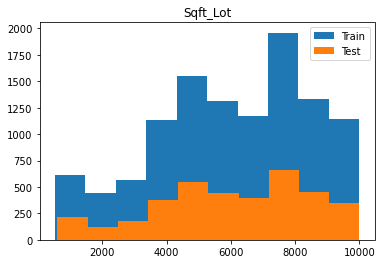

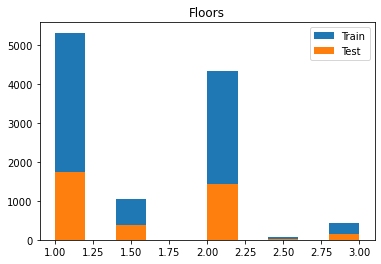

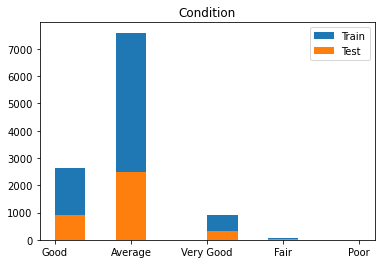

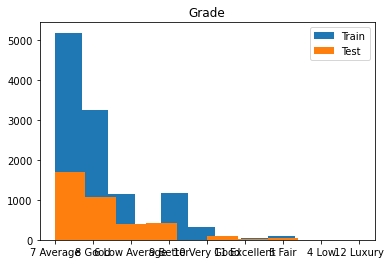

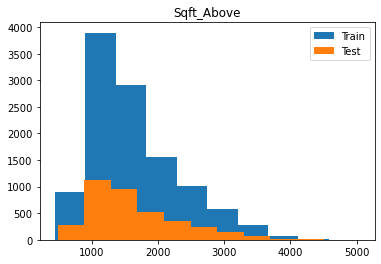

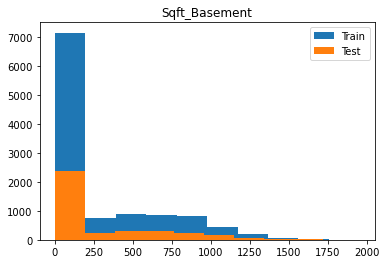

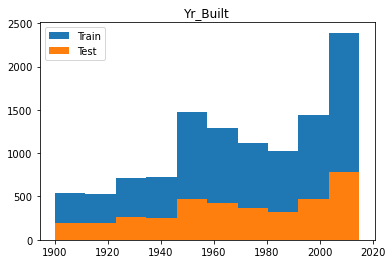

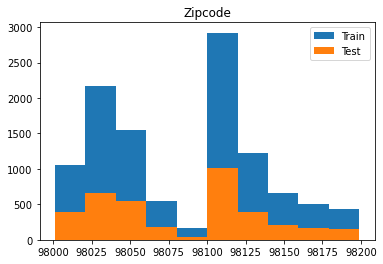

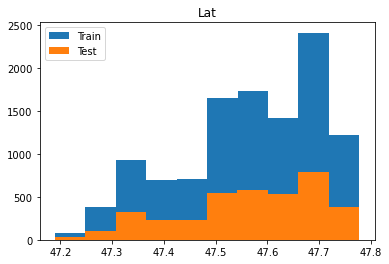

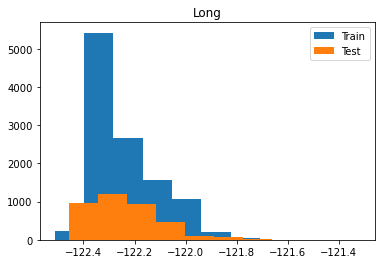

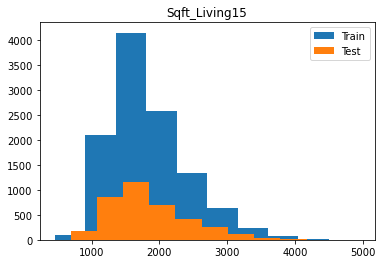

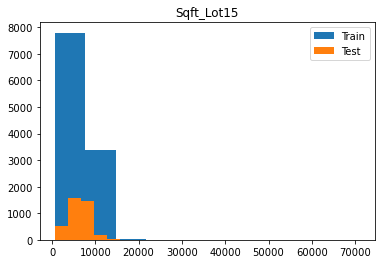

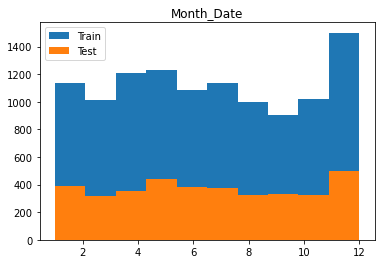

In [29]:
used_cols = [c for c in df_limited.columns if c not in ['price']]

for col in used_cols:
    plt.hist(X_train[col], label = 'Train')
    plt.hist(X_test[col], label = 'Test')
    plt.title(f"{col.title()}")
    plt.legend()
    plt.show()

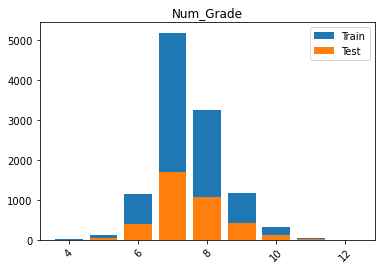

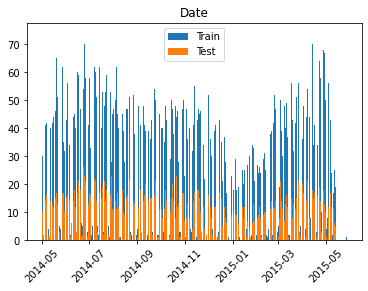

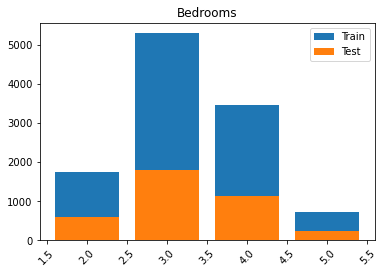

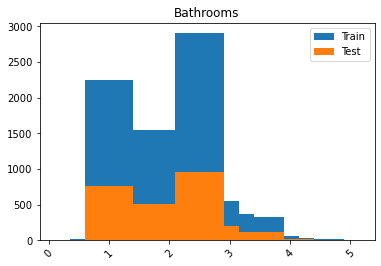

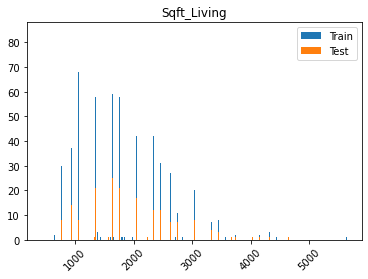

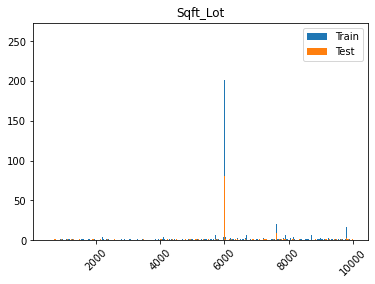

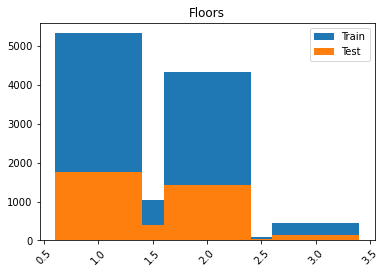

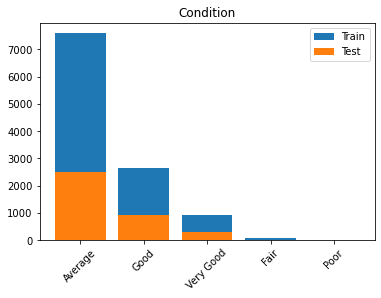

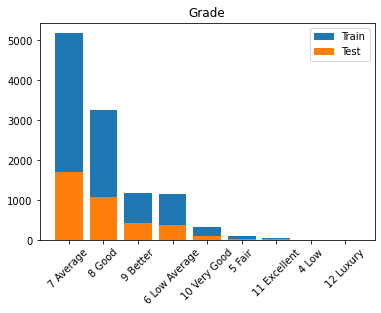

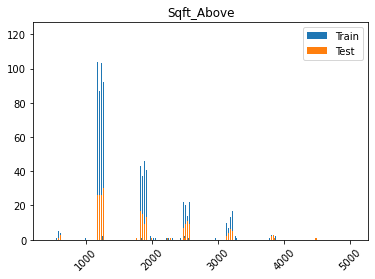

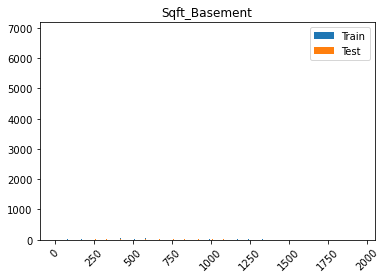

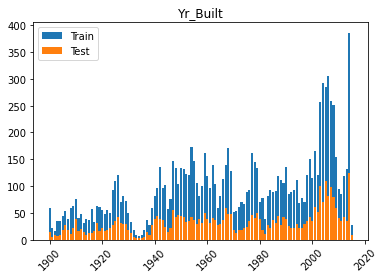

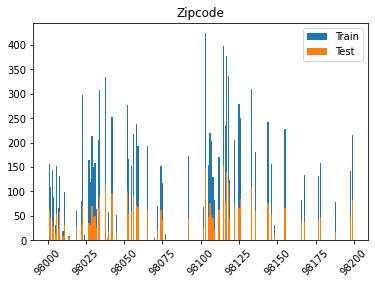

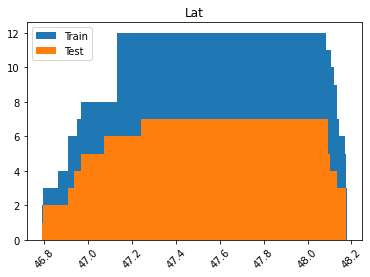

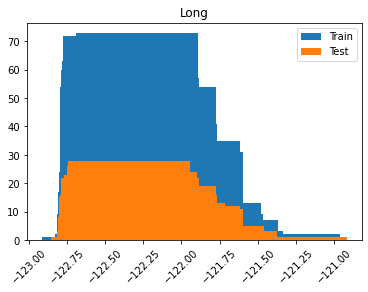

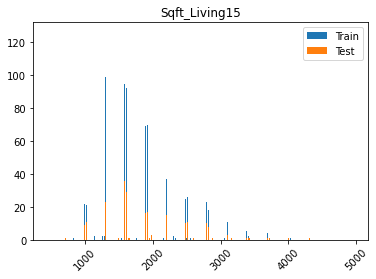

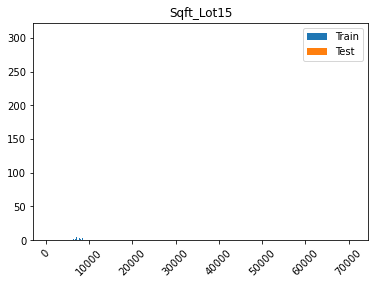

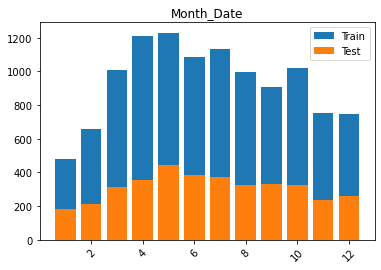

In [30]:
for col in used_cols:
    train_values = X_train[col].value_counts()
    test_values = X_test[col].value_counts()
    plt.bar(train_values.index, train_values, label = 'Train')
    plt.bar(test_values.index, test_values, label = 'Test')
    plt.title(f"{col.title()}")
    plt.xticks(rotation = 45)
    plt.legend()
    plt.show()

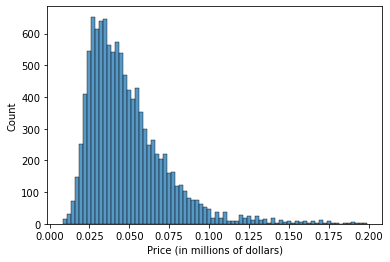

In [31]:
sns.histplot(y_train/10000000)
plt.xlabel("Price (in millions of dollars)");

<AxesSubplot:>

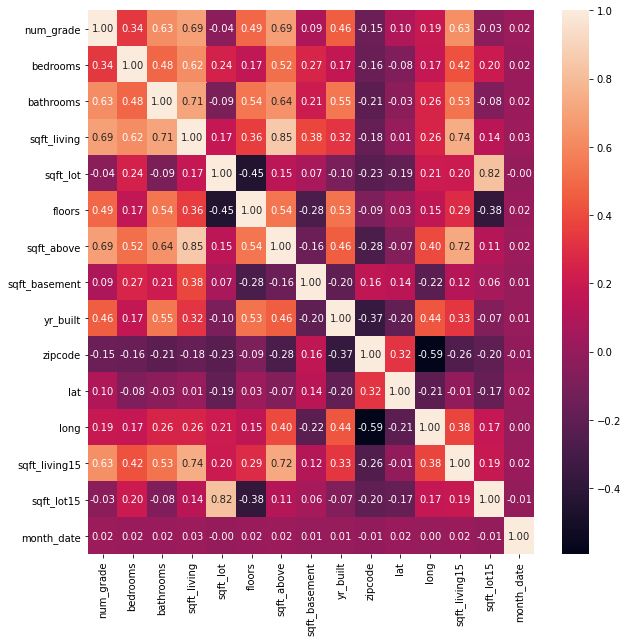

In [32]:
plt.figure(figsize = (10,10))
sns.heatmap(X_train.corr(), annot = True, fmt = '.2f')

<AxesSubplot:>

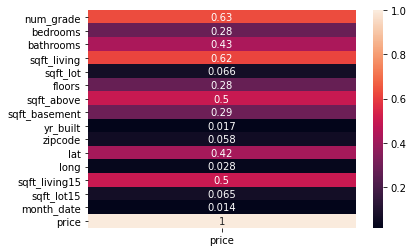

In [33]:
sns.heatmap(abs(train_df.corr())[['price']], annot = True)

In [34]:
train_target_mean = y_train.mean()
train_target_mean

485144.6841449301

In [35]:
baseline_train_preds = [train_target_mean] * len(y_train)
baseline_test_preds = [train_target_mean] * len(y_test)

In [36]:
print(f"Train R2: {r2_score(y_train, baseline_train_preds)}")
print(f"Test R2: {r2_score(y_test, baseline_test_preds)}")
print('****')
print(f"Train RMSE: {mean_squared_error(y_train, baseline_train_preds, squared = False)}")
print(f"Test RMSE: {mean_squared_error(y_test, baseline_test_preds, squared = False)}") 



Train R2: 0.0
Test R2: -0.000801449053849268
****
Train RMSE: 249627.7288447142
Test RMSE: 256214.39931304308


In [37]:
fsm_X_train = X_train['sqft_living']
fsm_X_test = X_test['sqft_living']

In [38]:
ssm_X_train = X_train['sqft_living15']
ssm_X_test = X_test['sqft_living15']

In [39]:
ssm = sm.OLS(y_train, sm.add_constant(ssm_X_train)).fit()


In [40]:
ssm_train_preds = ssm.predict(sm.add_constant(ssm_X_train))
ssm_test_preds = ssm.predict(sm.add_constant(ssm_X_test))

In [41]:
ssm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     3799.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:11:21   Log-Likelihood:            -1.5390e+05
No. Observations:               11233   AIC:                         3.078e+05
Df Residuals:                   11231   BIC:                         3.078e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.161e+04   6856.736     11.902      0.000    6.82e+04    9.51e+04
sqft_living15   219.8569      3.567     61.633      0.000     212.865     226.849
==============================================================================
Omnibus:                     3683.989   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14966.686
Skew:                           1.584   Prob(JB):                         0.00
Kurtosis:                       7.685   Cond. No.                     6.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
fsm = sm.OLS(y_train, sm.add_constant(fsm_X_train)).fit()


In [43]:
fsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     6958.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:11:21   Log-Likelihood:            -1.5283e+05
No. Observations:               11233   AIC:                         3.057e+05
Df Residuals:                   11231   BIC:                         3.057e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.912e+04   5207.475     15.194      0.000    6.89e+04    8.93e+04
sqft_living   214.6121      2.573     83.416      0.000     209.569     219.655
==============================================================================
Omnibus:                     2550.484   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7571.953
Skew:                           1.178   Prob(JB):                         0.00
Kurtosis:                       6.260   Cond. No.                     5.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
fsm_train_preds = fsm.predict(sm.add_constant(fsm_X_train))
fsm_test_preds = fsm.predict(sm.add_constant(fsm_X_test))

In [45]:
print(f"Train R2: {r2_score(y_train, fsm_train_preds)}")
print(f"Test R2: {r2_score(y_test, fsm_test_preds)}")
print('****')
print(f"Train RMSE: {mean_squared_error(y_train, fsm_train_preds, squared = False)}")
print(f"Test RMSE: {mean_squared_error(y_test, fsm_test_preds, squared = False)}") 


Train R2: 0.3825483106403561
Test R2: 0.379847671762207
****
Train RMSE: 196152.71200816112
Test RMSE: 201687.3965826005


In [46]:
def evaluate(y_tr, tr_preds, y_te, te_preds):
    """
    Evaluate the amount of error between my model's predictions and the actual values for both a train and a test set.
    
    Inputs:
    y_train - array like, actual vales for 'price' for my train dataset
    train_preds - array like, predicted values for 'price' for my train dataset
    y_teast - array like, actual vales for 'price' for my train dataset
    test_preds - array like, predicted values for 'price' for my train dataset
    
    Outputs:
    
    """
    
    
    print(f"Train R2: {r2_score(y_tr, tr_preds):.4f}")
    print(f"Test R2: {r2_score(y_te, te_preds):.4f}")
    print('****')
    print(f"Train RMSE: ${mean_squared_error(y_tr, tr_preds, squared = False):,.2f}")
    print(f"Test RMSE: ${mean_squared_error(y_te, te_preds, squared = False):,.2f}") 
    print('****')
    print(f"Train MAE: ${mean_absolute_error(y_tr, tr_preds):,.2f}")
    print(f"Test MAE: ${mean_absolute_error(y_te, te_preds):,.2f}")
    
    #calculate our residiuals
    
    train_residuals = y_tr - tr_preds
    test_residuals = y_te - te_preds
    #Scatter plot
    plt.scatter(tr_preds,train_residuals, label = "Train")
    plt.scatter(te_preds, test_residuals, label = "Test")
    
    plt.axhline(y = 0, color = 'red', label = '0')
    plt.xlabel('predictions')
    plt.ylabel('residuals')
    plt.legend()
    plt.show()

Train R2: 0.3825
Test R2: 0.3798
****
Train RMSE: $196,152.71
Test RMSE: $201,687.40
****
Train MAE: $147,085.55
Test MAE: $151,060.17


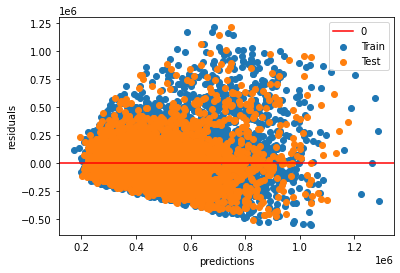

In [47]:
evaluate(y_train, fsm_train_preds, y_test, fsm_test_preds)

Train R2: 0.2527
Test R2: 0.2562
****
Train RMSE: $215,788.71
Test RMSE: $220,885.56
****
Train MAE: $157,145.97
Test MAE: $159,886.09


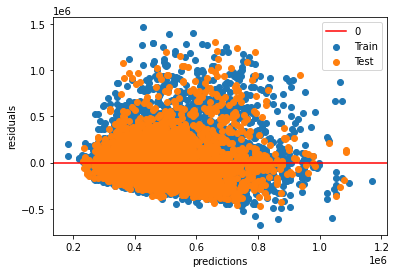

In [48]:
evaluate(y_train, ssm_train_preds, y_test, ssm_test_preds)

In [49]:
used_cols = [c for c in X_train.columns if c not in [*obj_cols]]

In [50]:
#model = sm.OLS(y_train, sm.add_constant(X_train['sqft_living'])).fit()

In [51]:
model = sm.OLS(y_train, sm.add_constant(X_train[used_cols])).fit()

In [52]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     1801.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:11:22   Log-Likelihood:            -1.4892e+05
No. Observations:               11233   AIC:                         2.979e+05
Df Residuals:                   11218   BIC:                         2.980e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7.463e+06   2.85e+06     -2.621      0.009    -1.3e+07   -1.88e+06
num_grade      1.043e+05   2205.210     47.316      0.000       1e+05    1.09e+05
bedrooms      -2.259e+04   2181.408    -10.356      0.000   -2.69e+04   -1.83e+04
bathrooms      2.847e+04   3242.939      8.778      0.000    2.21e+04    3.48e+04
sqft_living     132.6879      4.883     27.174      0.000     123.117     142.259
sqft_lot         -6.7006      1.082     -6.192      0.000      -8.822      -4.580
floors         1.387e+04   4065.510      3.411      0.001    5898.528    2.18e+04
sqft_above       -0.5661      4.978     -0.114      0.909     -10.323       9.191
yr_built      -2777.7138     60.754    -45.720      0.000   -2896.803   -2658.624
zipcode        -245.3682     32.472     -7.556      0.000    -309.018    -181.718
lat            5.467e+05   1.07e+04     51.300      0.000    5.26e+05    5.68e+05
long           -8.55e+04   1.41e+04     -6.081      0.000   -1.13e+05   -5.79e+04
sqft_living15    36.1159      3.778      9.559      0.000      28.710      43.522
sqft_lot15       -1.1286      0.862     -1.309      0.191      -2.819       0.562
month_date    -3190.2329    419.609     -7.603      0.000   -4012.739   -2367.727
==============================================================================
Omnibus:                     3748.727   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23803.082
Skew:                           1.454   Prob(JB):                         0.00
Kurtosis:                       9.512   Cond. No.                     2.15e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
#sec_model.summary()

Train R2: 0.6921
Test R2: 0.6820
****
Train RMSE: $138,518.37
Test RMSE: $144,423.56
****
Train MAE: $97,967.04
Test MAE: $101,765.87


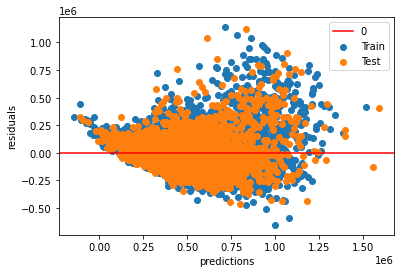

In [54]:
train_preds = model.predict(sm.add_constant(X_train[used_cols]))
test_preds = model.predict(sm.add_constant(X_test[used_cols]))
evaluate(y_train, train_preds, y_test, test_preds)

In [55]:
scaler = StandardScaler()

scaler.fit(X_train[used_cols])



StandardScaler()

In [56]:
X_train_scaled = scaler.transform(X_train[used_cols])
X_test_scaled = scaler.transform(X_test[used_cols])

## Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?

### Baseline Understanding

- What does a baseline, model-less prediction look like?

In [58]:
# code here to arrive at a baseline prediction

### First $&(@# Model

Before going too far down the data preparation rabbit hole, be sure to check your work against a first 'substandard' model! What is the easiest way for you to find out how hard your problem is?

In [59]:
#Our first model using the feature with highest correlation to price
simple_formula = 'price ~ sqft_living + bedrooms + bathrooms + sqft_living15'
date_mod = ols(formula = simple_formula, data = df_limited).fit()
date_mod_summ = date_mod.summary()

date_mod_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     2521.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:11:22   Log-Likelihood:            -2.0364e+05
No. Observations:               14978   AIC:                         4.073e+05
Df Residuals:                   14973   BIC:                         4.073e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.533e+05   7689.167     19.942      0.000    1.38e+05    1.68e+05
sqft_living     225.4880      4.292     52.534      0.000     217.075     233.901
bedrooms      -5.088e+04   2551.508    -19.941      0.000   -5.59e+04   -4.59e+04
bathrooms      1227.4201   3199.539      0.384      0.701   -5044.068    7498.908
sqft_living15    38.4257      4.134      9.296      0.000      30.323      46.528
==============================================================================
Omnibus:                     3263.117   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9301.100
Skew:                           1.147   Prob(JB):                         0.00
Kurtosis:                       6.105   Cond. No.                     1.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
train_preds_log = model.predict(sm.add_constant(X_train_scaled))

In [61]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

In [62]:
model = sm.OLS(y_train_log, sm.add_constant(X_train_scaled)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     2399.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:11:22   Log-Likelihood:                 347.67
No. Observations:               11233   AIC:                            -665.3
Df Residuals:                   11218   BIC:                            -555.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.9795      0.002   5859.972      0.000      12.975      12.984
x1             0.1744      0.004     47.973      0.000       0.167       0.182
x2            -0.0126      0.003     -4.266      0.000      -0.018      -0.007
x3             0.0431      0.004     11.029      0.000       0.035       0.051
x4             0.1548      0.006     26.028      0.000       0.143       0.167
x5            -0.0400      0.004     -9.165      0.000      -0.049      -0.031
x6             0.0092      0.004      2.397      0.017       0.002       0.017
x7            -0.0078      0.006     -1.369      0.171      -0.019       0.003
x8            -0.1457      0.003    -44.647      0.000      -0.152      -0.139
x9            -0.0287      0.003     -9.889      0.000      -0.034      -0.023
x10            0.1926      0.002     78.562      0.000       0.188       0.197
x11           -0.0073      0.003     -2.347      0.019      -0.013      -0.001
x12            0.0563      0.004     15.408      0.000       0.049       0.063
x13           -0.0213      0.004     -5.459      0.000      -0.029      -0.014
x14           -0.0182      0.002     -8.214      0.000      -0.023      -0.014
==============================================================================
Omnibus:                      262.650   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              561.010
Skew:                          -0.108   Prob(JB):                    1.51e-122
Kurtosis:                       4.073   Cond. No.                         7.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
train_preds_log = model.predict(sm.add_constant(X_train_scaled))
test_preds_log = model.predict(sm.add_constant(X_test_scaled))

In [64]:
train_preds_unlog = np.exp(train_preds_log)
test_preds_unlog = np.exp(test_preds_log)

Train R2: 0.6921
Test R2: 0.6820
****
Train RMSE: $138,518.37
Test RMSE: $144,423.56
****
Train MAE: $97,967.04
Test MAE: $101,765.87


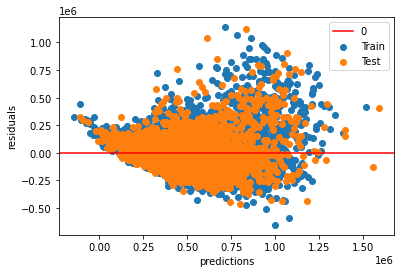

In [65]:
evaluate(y_train, train_preds, y_test, test_preds)

Train R2: 0.7496
Test R2: 0.7386
****
Train RMSE: $0.23
Test RMSE: $0.24
****
Train MAE: $0.18
Test MAE: $0.19


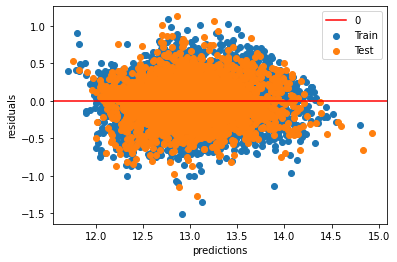

In [66]:
evaluate(y_train_log, train_preds_log, y_test_log, test_preds_log)

In [67]:
print(mean_squared_error(y_train, train_preds_unlog, squared = False))
print(mean_squared_error(y_test, test_preds_unlog, squared = False))

134037.00665330264
143311.2967874328


In [68]:
print(mean_absolute_error(y_train, train_preds_unlog))
print(mean_absolute_error(y_test, test_preds_unlog))

89471.26399206145
94019.17450501327


In [69]:
# code here to evaluate your first 'substandard' model

### Modeling Iterations

Now you can start to use the results of your first model to iterate - there are many options!

# Danielle models

In [70]:
used_cols

['num_grade',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'yr_built',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'month_date']

In [71]:
X_train.columns

Index(['num_grade', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'month_date'],
      dtype='object')

In [72]:
X_train['sqft_living_per_bathroom'] = X_train['sqft_living']/X_train['bathrooms']

In [73]:
X_train_subset_1 = X_train[['sqft_living', 'lat', 'sqft_living_per_bathroom']]
model2 = sm.OLS(y_train_log, sm.add_constant(X_train_subset_1)).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     6366.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:11:23   Log-Likelihood:                -1850.2
No. Observations:               11233   AIC:                             3708.
Df Residuals:                   11229   BIC:                             3738.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -72.2503      0.944    -76.533      0.000     -74.101     -70.400
sqft_living                  0.0004   3.98e-06    100.461      0.000       0.000       0.000
lat                          1.7773      0.020     89.504      0.000       1.738       1.816
sqft_living_per_bathroom -6.626e-05   1.01e-05     -6.536      0.000   -8.61e-05   -4.64e-05
==============================================================================
Omnibus:                       92.809   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.991
Skew:                           0.079   Prob(JB):                     1.79e-30
Kurtosis:                       3.517   Cond. No.                     7.84e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
#evaluate(y_train, y_train_log, y_test, y_test_log)

In [75]:
X_train_subset_2 = X_train[['lat', 'sqft_living_per_bathroom']]
model3 = sm.OLS(y_train_log, sm.add_constant(X_train_subset_2)).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     2372.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:11:23   Log-Likelihood:                -5451.6
No. Observations:               11233   AIC:                         1.091e+04
Df Residuals:                   11230   BIC:                         1.093e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -70.5452      1.301    -54.241      0.000     -73.095     -67.996
lat                          1.7503      0.027     63.977      0.000       1.697       1.804
sqft_living_per_bathroom     0.0003   1.31e-05     21.425      0.000       0.000       0.000
==============================================================================
Omnibus:                      102.994   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.735
Skew:                           0.112   Prob(JB):                     2.26e-32
Kurtosis:                       3.511   Cond. No.                     3.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
X_train.columns

Index(['num_grade', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'month_date', 'sqft_living_per_bathroom'],
      dtype='object')

In [77]:
X_train_subset_3 = X_train[['sqft_living', 'lat', 'sqft_living_per_bathroom', 'sqft_living15']]
model4 = sm.OLS(y_train_log, sm.add_constant(X_train_subset_3)).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     4984.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:11:23   Log-Likelihood:                -1696.9
No. Observations:               11233   AIC:                             3404.
Df Residuals:                   11228   BIC:                             3441.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -72.7648      0.932    -78.095      0.000     -74.591     -70.938
sqft_living                  0.0003   5.72e-06     57.181      0.000       0.000       0.000
lat                          1.7861      0.020     91.149      0.000       1.748       1.825
sqft_living_per_bathroom -5.602e-05      1e-05     -5.593      0.000   -7.57e-05   -3.64e-05
sqft_living15                0.0001   6.94e-06     17.625      0.000       0.000       0.000
==============================================================================
Omnibus:                       62.521   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.358
Skew:                           0.034   Prob(JB):                     3.95e-20
Kurtosis:                       3.432   Cond. No.                     1.03e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
X_train_subset_4 = X_train[['sqft_living', 'lat', 'sqft_living_per_bathroom', 'sqft_lot']]
model5 = sm.OLS(y_train_log, sm.add_constant(X_train_subset_4)).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     5104.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:11:23   Log-Likelihood:                -1610.8
No. Observations:               11233   AIC:                             3232.
Df Residuals:                   11228   BIC:                             3268.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -67.5506      0.948    -71.233      0.000     -69.409     -65.692
sqft_living                  0.0004   3.91e-06    104.143      0.000       0.000       0.000
lat                          1.6804      0.020     84.321      0.000       1.641       1.719
sqft_living_per_bathroom -7.664e-06   1.03e-05     -0.746      0.456   -2.78e-05    1.25e-05
sqft_lot                 -2.625e-05   1.19e-06    -22.112      0.000   -2.86e-05   -2.39e-05
==============================================================================
Omnibus:                      157.282   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.808
Skew:                           0.119   Prob(JB):                     1.04e-56
Kurtosis:                       3.703   Cond. No.                     2.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
X_train_subset_6 = X_train[['sqft_living', 'sqft_living_per_bathroom', 'sqft_lot']]
model7 = sm.OLS(y_train_log, sm.add_constant(X_train_subset_6)).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     2716.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:11:23   Log-Likelihood:                -4366.1
No. Observations:               11233   AIC:                             8740.
Df Residuals:                   11229   BIC:                             8769.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       12.4063      0.014    885.552      0.000      12.379      12.434
sqft_living                  0.0004      5e-06     81.879      0.000       0.000       0.000
sqft_living_per_bathroom  9.348e-05    1.3e-05      7.170      0.000    6.79e-05       0.000
sqft_lot                 -4.828e-05   1.48e-06    -32.621      0.000   -5.12e-05   -4.54e-05
==============================================================================
Omnibus:                       13.153   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               11.414
Skew:                           0.012   Prob(JB):                      0.00332
Kurtosis:                       2.846   Cond. No.                     2.83e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
X_train_subset_5 = X_train[['sqft_living', 'lat', 'sqft_living_per_bathroom', 'sqft_lot', 'date']]
model6 = sm.OLS(y_train_log, sm.add_constant(X_train_subset_3)).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     4984.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:11:23   Log-Likelihood:                -1696.9
No. Observations:               11233   AIC:                             3404.
Df Residuals:                   11228   BIC:                             3441.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -72.7648      0.932    -78.095      0.000     -74.591     -70.938
sqft_living                  0.0003   5.72e-06     57.181      0.000       0.000       0.000
lat                          1.7861      0.020     91.149      0.000       1.748       1.825
sqft_living_per_bathroom -5.602e-05      1e-05     -5.593      0.000   -7.57e-05   -3.64e-05
sqft_living15                0.0001   6.94e-06     17.625      0.000       0.000       0.000
==============================================================================
Omnibus:                       62.521   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.358
Skew:                           0.034   Prob(JB):                     3.95e-20
Kurtosis:                       3.432   Cond. No.                     1.03e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
X_train_subset_6 = X_train[['sqft_living', 'lat', 'sqft_living_per_bathroom', 'sqft_living15']]
model7 = sm.OLS(y_train_log, sm.add_constant(X_train_subset_3)).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     4984.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:11:23   Log-Likelihood:                -1696.9
No. Observations:               11233   AIC:                             3404.
Df Residuals:                   11228   BIC:                             3441.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -72.7648      0.932    -78.095      0.000     -74.591     -70.938
sqft_living                  0.0003   5.72e-06     57.181      0.000       0.000       0.000
lat                          1.7861      0.020     91.149      0.000       1.748       1.825
sqft_living_per_bathroom -5.602e-05      1e-05     -5.593      0.000   -7.57e-05   -3.64e-05
sqft_living15                0.0001   6.94e-06     17.625      0.000       0.000       0.000
==============================================================================
Omnibus:                       62.521   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.358
Skew:                           0.034   Prob(JB):                     3.95e-20
Kurtosis:                       3.432   Cond. No.                     1.03e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
X_train_subset_7 = X_train[['sqft_living', 'lat', 'sqft_living_per_bathroom', 'floors']]
model8 = sm.OLS(y_train_log, sm.add_constant(X_train_subset_7)).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     4856.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:11:23   Log-Likelihood:                -1790.1
No. Observations:               11233   AIC:                             3590.
Df Residuals:                   11228   BIC:                             3627.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -71.7798      0.940    -76.359      0.000     -73.622     -69.937
sqft_living                  0.0004   4.47e-06     84.388      0.000       0.000       0.000
lat                          1.7655      0.020     89.249      0.000       1.727       1.804
sqft_living_per_bathroom -2.229e-05   1.08e-05     -2.054      0.040   -4.36e-05   -1.02e-06
floors                       0.0609      0.006     10.991      0.000       0.050       0.072
==============================================================================
Omnibus:                       96.378   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.245
Skew:                           0.088   Prob(JB):                     2.13e-31
Kurtosis:                       3.520   Cond. No.                     7.85e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
X_train_subset_8 = X_train[['sqft_living', 'lat', 'sqft_living_per_bathroom', 'sqft_lot', 'floors']]
model9 = sm.OLS(y_train_log, sm.add_constant(X_train_subset_8)).fit()
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     4083.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:11:23   Log-Likelihood:                -1610.8
No. Observations:               11233   AIC:                             3234.
Df Residuals:                   11227   BIC:                             3278.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -67.5260      0.952    -70.957      0.000     -69.391     -65.661
sqft_living                  0.0004   4.69e-06     87.042      0.000       0.000       0.000
lat                          1.6799      0.020     84.085      0.000       1.641       1.719
sqft_living_per_bathroom -8.598e-06   1.07e-05     -0.803      0.422   -2.96e-05    1.24e-05
sqft_lot                 -2.648e-05   1.39e-06    -19.086      0.000   -2.92e-05   -2.38e-05
floors                      -0.0020      0.006     -0.311      0.756      -0.014       0.011
==============================================================================
Omnibus:                      157.768   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.861
Skew:                           0.119   Prob(JB):                     6.15e-57
Kurtosis:                       3.705   Cond. No.                     2.46e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
X_train_subset_9 = X_train[['sqft_living', 'lat', 'sqft_living_per_bathroom', 'sqft_lot', 'sqft_basement']]
model10 = sm.OLS(y_train_log, sm.add_constant(X_train_subset_9)).fit()
model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     4085.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:11:23   Log-Likelihood:                -1609.3
No. Observations:               11233   AIC:                             3231.
Df Residuals:                   11227   BIC:                             3274.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -67.7790      0.957    -70.822      0.000     -69.655     -65.903
sqft_living                  0.0004   4.15e-06     98.785      0.000       0.000       0.000
lat                          1.6851      0.020     83.809      0.000       1.646       1.725
sqft_living_per_bathroom -5.558e-06   1.03e-05     -0.537      0.591   -2.58e-05    1.47e-05
sqft_lot                 -2.625e-05   1.19e-06    -22.109      0.000   -2.86e-05   -2.39e-05
sqft_basement            -1.342e-05   7.62e-06     -1.763      0.078   -2.84e-05    1.51e-06
==============================================================================
Omnibus:                      154.520   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.378
Skew:                           0.119   Prob(JB):                     2.59e-55
Kurtosis:                       3.693   Cond. No.                     2.47e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
X_train_subset_10 = X_train[['lat', 'sqft_living_per_bathroom', 'sqft_lot', 'sqft_living15']]
model11 = sm.OLS(y_train_log, sm.add_constant(X_train_subset_10)).fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     3518.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:11:23   Log-Likelihood:                -2867.6
No. Observations:               11233   AIC:                             5745.
Df Residuals:                   11228   BIC:                             5782.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -67.8308      1.061    -63.957      0.000     -69.910     -65.752
lat                          1.6829      0.022     75.511      0.000       1.639       1.727
sqft_living_per_bathroom     0.0002   1.11e-05     15.461      0.000       0.000       0.000
sqft_lot                 -3.113e-05   1.34e-06    -23.283      0.000   -3.38e-05   -2.85e-05
sqft_living15                0.0004   5.35e-06     80.126      0.000       0.000       0.000
==============================================================================
Omnibus:                      389.984   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              878.826
Skew:                           0.204   Prob(JB):                    1.46e-191
Kurtosis:                       4.308   Cond. No.                     2.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
X_train.columns

Index(['num_grade', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'month_date', 'sqft_living_per_bathroom'],
      dtype='object')

In [87]:
X_train_subset_11 = X_train[['sqft_living', 'lat', 'sqft_living_per_bathroom', 'sqft_living15', 'num_grade']]
model2 = sm.OLS(y_train_log, sm.add_constant(X_train_subset_11)).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     4844.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:11:23   Log-Likelihood:                -972.97
No. Observations:               11233   AIC:                             1958.
Df Residuals:                   11227   BIC:                             2002.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -68.0748      0.882    -77.205      0.000     -69.803     -66.346
sqft_living                  0.0002    6.1e-06     34.875      0.000       0.000       0.000
lat                          1.6691      0.019     89.677      0.000       1.633       1.706
sqft_living_per_bathroom  3.833e-05   9.69e-06      3.953      0.000    1.93e-05    5.73e-05
sqft_living15             5.738e-05   6.71e-06      8.553      0.000    4.42e-05    7.05e-05
num_grade                    0.1496      0.004     39.301      0.000       0.142       0.157
==============================================================================
Omnibus:                       76.255   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.017
Skew:                           0.062   Prob(JB):                     1.29e-24
Kurtosis:                       3.469   Cond. No.                     1.04e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
X_train_subset_12 = X_train[['sqft_living', 'lat', 'sqft_living15', 'num_grade']]
model3 = sm.OLS(y_train_log, sm.add_constant(X_train_subset_12)).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     6043.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:11:23   Log-Likelihood:                -980.78
No. Observations:               11233   AIC:                             1972.
Df Residuals:                   11228   BIC:                             2008.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -68.3728      0.879    -77.777      0.000     -70.096     -66.650
sqft_living       0.0002   5.71e-06     38.747      0.000       0.000       0.000
lat               1.6764      0.019     90.453      0.000       1.640       1.713
sqft_living15  5.755e-05   6.71e-06      8.574      0.000    4.44e-05    7.07e-05
num_grade         0.1459      0.004     39.528      0.000       0.139       0.153
==============================================================================
Omnibus:                       79.896   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.566
Skew:                           0.076   Prob(JB):                     2.19e-25
Kurtosis:                       3.468   Cond. No.                     9.78e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [122]:
X_train_subset_14 = X_train[['sqft_living','long', 'sqft_living15', 'num_grade']]
model15 = sm.OLS(y_train_log, sm.add_constant(X_train_subset_14)).fit()
model15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     2675.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:59:37   Log-Likelihood:                -3671.0
No. Observations:               11233   AIC:                             7352.
Df Residuals:                   11228   BIC:                             7389.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -79.9475      3.231    -24.746      0.000     -86.280     -73.615
sqft_living       0.0002   7.25e-06     27.879      0.000       0.000       0.000
long             -0.7444      0.026    -28.189      0.000      -0.796      -0.693
sqft_living15  9.324e-05   8.91e-06     10.465      0.000    7.58e-05       0.000
num_grade         0.1841      0.005     39.572      0.000       0.175       0.193
==============================================================================
Omnibus:                       94.878   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.613
Skew:                          -0.192   Prob(JB):                     2.11e-20
Kurtosis:                       2.784   Cond. No.                     2.83e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [123]:
X_train_subset_13 = X_train[['sqft_living', 'lat', 'long', 'sqft_living15', 'num_grade']]
model14 = sm.OLS(y_train_log, sm.add_constant(X_train_subset_13)).fit()
model14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     5020.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:59:42   Log-Likelihood:                -835.55
No. Observations:               11233   AIC:                             1683.
Df Residuals:                   11227   BIC:                             1727.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -109.1848      2.533    -43.103      0.000    -114.150    -104.219
sqft_living       0.0002   5.63e-06     39.057      0.000       0.000       0.000
lat               1.6080      0.019     85.867      0.000       1.571       1.645
long             -0.3601      0.021    -17.149      0.000      -0.401      -0.319
sqft_living15  9.187e-05   6.92e-06     13.271      0.000    7.83e-05       0.000
num_grade         0.1436      0.004     39.392      0.000       0.136       0.151
==============================================================================
Omnibus:                       60.302   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.587
Skew:                          -0.020   Prob(JB):                     1.58e-19
Kurtosis:                       3.428   Cond. No.                     2.86e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
scaler = StandardScaler()

scaler.fit(X_train_subset_13)

X_test_subset_13 = X_test[['sqft_living', 'lat', 'long', 'sqft_living15', 'num_grade']]

X_train_scaled_13 = scaler.transform(X_train_subset_13)
X_test_scaled_13 = scaler.transform(X_test_subset_13)

In [129]:
train_preds_log_13 = model14.predict(sm.add_constant(X_train_subset_13))
test_preds_log_13 = model14.predict(sm.add_constant(X_test_subset_13))

Train R2: 0.6909
Test R2: 0.6835
****
Train RMSE: $0.26
Test RMSE: $0.27
****
Train MAE: $0.20
Test MAE: $0.21


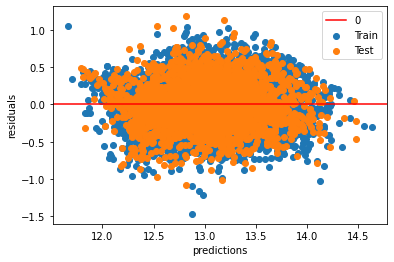

In [131]:
evaluate(y_train_log, train_preds_log_13, y_test_log, test_preds_log_13)

In [133]:
train_preds_unlog_13 = np.exp(train_preds_log_13)
test_preds_unlog_13 = np.exp(test_preds_log_13)

Train R2: 0.6360
Test R2: 0.6295
****
Train RMSE: $150,602.93
Test RMSE: $155,885.44
****
Train MAE: $102,722.04
Test MAE: $105,416.51


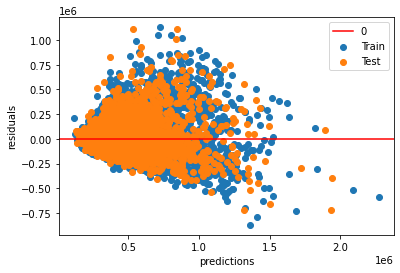

In [135]:
evaluate(y_train, train_preds_unlog_13, y_test, test_preds_unlog_13)

### 'Final' Model

In the end, you'll arrive at a 'final' model - aka the one you'll use to make your recommendations/conclusions. This likely blends any group work. It might not be the one with the highest scores, but instead might be considered 'final' or 'best' for other reasons.

In [89]:
# code here to show your final model

In [90]:
# code here to evaluate your final model

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?
